In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from scipy.integrate import ode 
from kuramoto import * # import the kuramoto classes from file 
from utils import *
from scipy import stats, optimize

## First, we do some 1D simulations.  

In [15]:
# Set up model parameters 
epsilon = 1
eta = -0.44
sigmas = [0.01, 0.1, 0.3, 0.45, 0.6]
mean_omega = 0


# Set up simulation parameters 
L = 160
T = 5e4 # total time of the simulation 
n_frames = T # number of time points recorded in the end 
grad = 1.3
grads = [-grad, grad]
seed = 30 

data = [] 
omegas = [] 
models = [] 


for sigma in sigmas:
    # Initialise the model and run the simulation 
    init = np.zeros(L)
    model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
    model.initialise(L, T, n_frames, init=init, seed=seed) 
    model.evolve() # this runs the simulation, set verbose to True to see output at every time step 
    
    phases = np.copy(model.res[-1]) % (2*np.pi)
    shift(phases)
    data.append(phases)
    omegas.append(model.omegas)
    models.append(model)

100%|██████████| 50000/50000 [08:27<00:00, 98.50it/s] 


slope:  0.13372342288484024
slope:  0.26983171640309483
slope:  0.6294167310935624
slope:  0.7725708729397304
slope:  0.6557857859739207


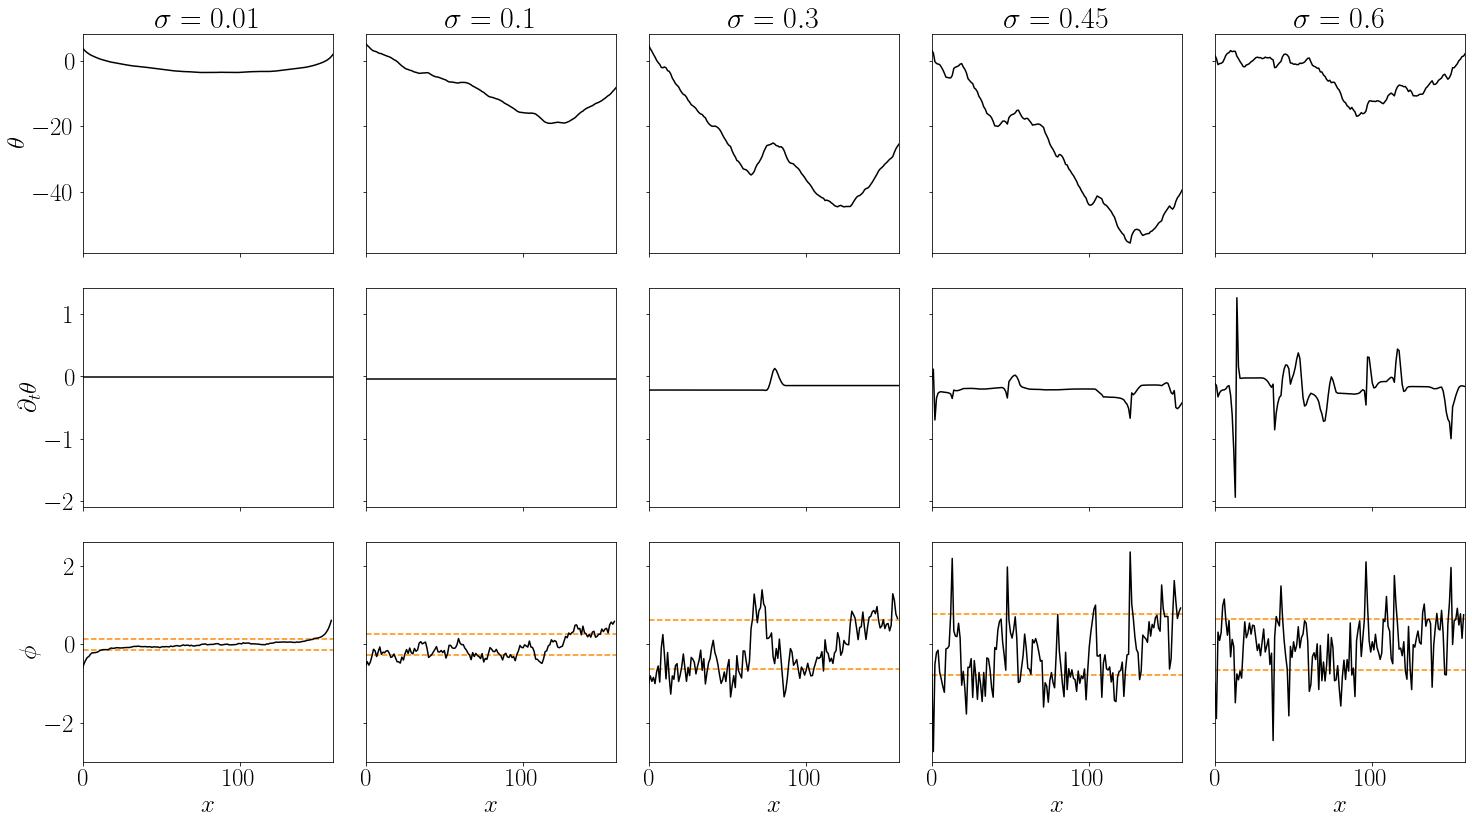

In [30]:
f = 5

plt.rc('text', usetex=True)
plt.rc('font', size=25, family='serif')
fig, axes = plt.subplots(3, len(sigmas[:f]), sharey='row', sharex=True, figsize=(4*len(sigmas[:f])+1, 12))

for (i, sigma) in enumerate(sigmas[:f]):
    axes[0, i].plot(data[i], 'k-')    
    axes[1, i].plot(models[i]._det_rhs(data[i]), 'k-')
    
    v = data[i][1:]-data[i][:-1]
    s = np.sqrt(2*np.mean(1-np.cos(v)))
    axes[2, i].axhline(y=s, color='darkorange', linestyle='--')
    axes[2, i].axhline(y=-s, color='darkorange', linestyle='--')
    axes[2, i].plot(v, 'k-')
    axes[2, i].set_xlabel(r'$x$')
    print('slope: ', s)
    axes[0, i].set_title(r'$\sigma={}$'.format(sigmas[i]))
    

axes[0, 0].set_ylabel(r'$\theta$')
axes[1, 0].set_ylabel(r'$\partial_t \theta $')
axes[2, 0].set_ylabel(r'$\phi$')
plt.xlim([0, L-1])
plt.savefig('sim.pdf')
plt.tight_layout()
plt.show() 

## Multiple simulations of the MAP parameters 

In [66]:
epsilon = 1
eta = -0.44
sigmas = 0.45
mean_omega = 0


# Set up simulation parameters 
L = 160
T = 1e5 # total time of the simulation 
n_frames = T # number of time points recorded in the end 
grad = 1.3
grads = [-grad, grad]


seeds = [1, 10, 100, 1000, 10000]  

data = [] 
omegas = [] 


for seed in seeds: 
    # Initialise the model and run the simulation 
    init = np.zeros(L)
    model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
    model.initialise(L, T, n_frames, init=init, seed=seed) 
    model.evolve() # this runs the simulation, set verbose to True to see output at every time step 
    
    phases = np.copy(model.res[-1]) % (2*np.pi)
    shift(phases)
    data.append(phases)
    omegas.append(model.omegas) 

100%|██████████| 100000/100000 [07:29<00:00, 222.34it/s]


In [64]:
np.save('data_sigma={}_eta={}_samples.npy'.format(sigma, eta), data)

slope:  0.712079115759401
slope:  0.6521532735653413
slope:  0.7089744357759522
slope:  0.7393419316303049
slope:  0.6366613575867764


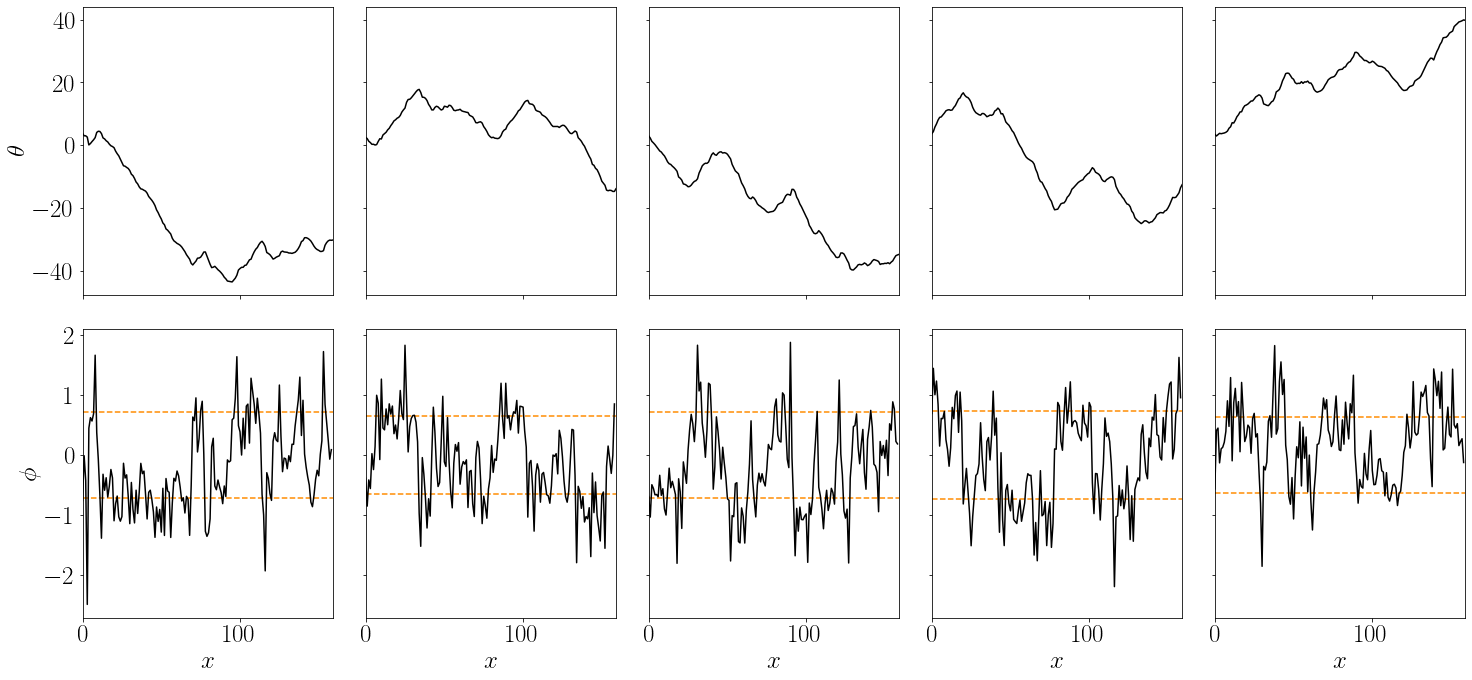

In [65]:
f = len(seeds)

plt.rc('text', usetex=True)
plt.rc('font', size=25, family='serif')
fig, axes = plt.subplots(2, f, sharey='row', sharex=True, figsize=(4*f+1, 10))

for i in range(f):
    axes[0, i].plot(data[i], 'k-')    

    v = data[i][1:]-data[i][:-1]
    s = np.sqrt(2*np.mean(1-np.cos(v)))
    axes[1, i].axhline(y=s, color='darkorange', linestyle='--')
    axes[1, i].axhline(y=-s, color='darkorange', linestyle='--')
    axes[1, i].plot(v, 'k-')
    axes[1, i].set_xlabel(r'$x$')
    print('slope: ', s)
    

axes[0, 0].set_ylabel(r'$\theta$')
axes[1, 0].set_ylabel(r'$\phi$')
plt.xlim([0, L-1])
plt.tight_layout()
plt.savefig('map_sim.pdf')
plt.show() 

## Kymograph 

In [47]:
epsilon = 1
eta = -0.44
sigma = 0.45
mean_omega = 0
seed=30

# Set up simulation parameters 
L = 160
T = 5e4 # total time of the simulation 
n_frames = T # number of time points recorded in the end 
grad = 1.3
grads = [-grad, grad]
init = np.zeros(L)
model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
model.initialise(L, T, n_frames, init=init, seed=seed) 
model.evolve() 

100%|██████████| 50000/50000 [03:06<00:00, 267.65it/s]


In [50]:
np.save('data_sigma={}_eta={}.npy'.format(sigma, eta), model.res)

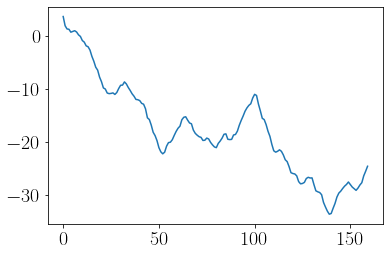

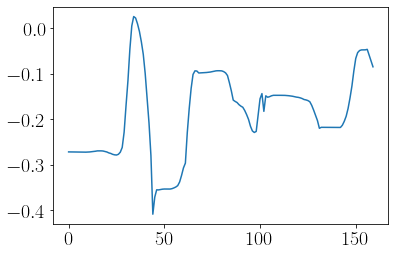

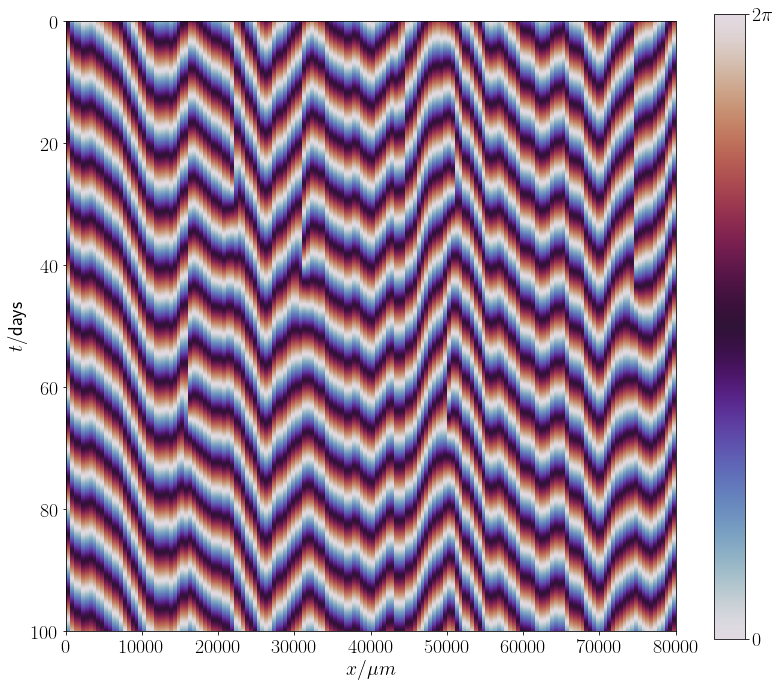

In [46]:
N = 2000
epsilon = 0.2
omega_extra = 2*np.pi/8.6/100/epsilon

phases = np.copy(model.res[-1, :]) % (2*np.pi)
shift(phases)
plt.plot(phases)
plt.show() 

plt.plot(model._det_rhs(phases))
plt.show() 


phases = np.copy(model.res[-N:, :])
phases += np.arange(N)[:, np.newaxis]*omega_extra

plt.figure(figsize=(12, 10))
plt.rc('font', size=20)
plt.rc('text', usetex=True)
im = plt.imshow(phases %(2*np.pi), cmap='twilight', interpolation='None', vmin=0, vmax=2*np.pi, extent=[0, L*500, N/100/epsilon, 0], aspect=800)
cbar = plt.colorbar(im)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi$'])
plt.xlabel(r'$x/\mu m$')
plt.ylabel(r'$t$/days')
plt.tight_layout()
plt.savefig('kymograph_sim.pdf')
plt.show() 